# Hacker News Post Review

Today we are going to do an analysis of Hacker News posts using a dataset of 12 months of Hacker News posts up to September 2016, found at https://www.kaggle.com/hacker-news/hacker-news-posts

We will be looking to understand how particular post callouts affect post engagement. We'll compare posts to determine the following:

- Do 'Ask HN' or 'Show HN' posts receive more comments on average?
- Do posts created at a certain time receive more comments on average?

In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline

# Read in Data, Clean & Prepare for Comment Analysis

In [2]:
# read in data as a DataFrame
hn = pd.read_csv('HN_posts_year_to_Sep_26_2016.csv')

In [3]:
# test output
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


In [4]:
# check length of DataFrame
hn.shape

(293119, 7)

In [5]:
# check if unique number of id = length of dataset (True)
hn.nunique()

id              293119
title           269452
url             247602
num_points         911
num_comments       548
author           51900
created_at      215563
dtype: int64

In [6]:
# set id as index
hn.set_index('id', inplace=True)

In [7]:
# check output
hn.head()

,title,url,num_points,num_comments,author,created_at
id,,,,,,
12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


In [8]:
# add new column 'Describe" and do string validation to find posts starting with "Ask HN" / "Show HN"
hn['describe'] = None
hn.loc[hn['title'].str.lower().str.startswith('ask hn'), 'describe'] = 'Ask HN'
hn.loc[hn['title'].str.lower().str.startswith('show hn'), 'describe'] = 'Show HN'

In [9]:
hn[hn['describe'] == 'Show HN']

,title,url,num_points,num_comments,author,created_at,describe
id,,,,,,,
12578335,Show HN: Finding puns computationally,http://puns.samueltaylor.org/,2,0,saamm,9/26/2016 0:36,Show HN
12578182,Show HN: A simple library for complicated anim...,https://christinecha.github.io/choreographer-js/,1,0,christinecha,9/26/2016 0:01,Show HN
12578098,Show HN: WebGL visualization of DNA sequences,http://grondilu.github.io/dna.html,1,0,grondilu,9/25/2016 23:44,Show HN
12577991,"Show HN: Pomodoro-centric, heirarchical projec...",https://github.com/jakebian/zeal,2,0,dbranes,9/25/2016 23:17,Show HN
12577142,Show HN: Jumble Essays on the go #PaulInYourP...,https://itunes.apple.com/us/app/jumble-find-st...,1,1,ryderj,9/25/2016 20:06,Show HN
...,...,...,...,...,...,...,...
10177714,Show HN: Repartee The SMS Messaging Stack for...,https://github.com/markgreenall/Repartee,2,0,Nuratu,9/6/2015 14:21,Show HN
10177631,Show HN: Immutable and type-checked state and ...,https://github.com/gcanti/redux-tcomb,20,2,gcanti,9/6/2015 13:50,Show HN
10177511,Show HN: MockTheClock A tiny JavaScript libra...,https://github.com/zb3/MockTheClock,18,6,zb3,9/6/2015 13:02,Show HN


In [10]:
# Fill NaN with 'Other'
hn['describe'].fillna('Other', inplace=True)

In [11]:
list(hn['describe'].unique())

['Other', 'Ask HN', 'Show HN']

In [12]:
# make function to find total number of posts, number of comments, and average number of comments for given describe value

def comment_analysis(column, key):
    if key == None:
        num_posts = hn[column].shape[0]
        num_comments = hn['num_comments'].sum()
        avg_comments = hn['num_comments'].mean()
    else:
        num_posts = hn[hn[column] == key].shape[0]
        num_comments = hn[hn[column] == key]['num_comments'].sum()
        avg_comments = hn[hn[column] == key]['num_comments'].mean()

    return {'num_posts' : num_posts,
           'num_comments' : num_comments,
           'avg_comments' : avg_comments}

In [13]:
# Testing function
comment_analysis('describe',None)

{'num_posts': 293119,
 'num_comments': 1912761,
 'avg_comments': 6.5255442328883495}

In [14]:
# run post analysis for all posts

comment_stats = {'All Posts' : comment_analysis('describe', None),
          'Ask HN' : comment_analysis('describe', 'Ask HN'),
          'Show HN' : comment_analysis('describe', 'Show HN'),
          'Other' : comment_analysis('describe', 'Other')}

In [15]:
# Turn results into a DataFrame
comment_results = pd.DataFrame(comment_stats).T
comment_results

,num_posts,num_comments,avg_comments
All Posts,293119.0,1912761.0,6.525544
Ask HN,9139.0,94986.0,10.393478
Show HN,10158.0,49633.0,4.886100
Other,273822.0,1768142.0,6.457268


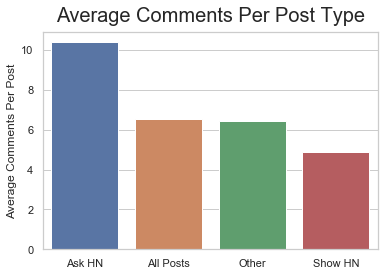

In [16]:
sns.set_theme(style='whitegrid')
ax = sns.barplot(x='index',
                y='avg_comments',
                data=comment_results.reset_index(),
                order=comment_results.sort_values('avg_comments', ascending=False).index)
ax.set(xlabel='', ylabel='Average Comments Per Post');
ax.set_title('Average Comments Per Post Type', pad=10, fontdict={'fontsize' : 20,
                                                                 'fontweight' : 3});

Interestingly, "Ask HN" seems to trigger a better response rate of 10 comments, while "Show HN" triggers a lower response rate of under 5 comments. The overall average number of comments per post is 6.5 comments.

# Does Time Affect Post Engagement?

Since "Ask HN" posts receive the most engagement, we will focus this analysis on these to understand if the time a post was created can influence its overall engagement.

In [17]:
# convert "created_at" column to datetime format
hn['created_at'] = pd.to_datetime(hn['created_at'], format='%m/%d/%Y %H:%M')

In [18]:
# create new column, "Hour" which designates the hour which the post was created
hn['hour'] = hn['created_at'].dt.hour

In [19]:
# check output
hn.head()

,title,url,num_points,num_comments,author,created_at,describe,hour
id,,,,,,,,
12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,2016-09-26 03:26:00,Other,3
12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,2016-09-26 03:24:00,Other,3
12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,2016-09-26 03:19:00,Other,3
12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,2016-09-26 03:16:00,Other,3
12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,2016-09-26 03:14:00,Other,3


In [20]:
# check values
hn['hour'].value_counts()

16    20170
17    19711
15    19525
18    18676
14    18138
19    17037
20    15955
13    15928
21    14516
12    12734
22    12417
23    10382
11    10352
10     9735
9      9052
0      8968
8      8503
1      7920
7      7800
2      7455
6      7380
3      7126
4      7103
5      6536
Name: hour, dtype: int64

In [21]:
# Make a DataFrame to show average number of comments for each hour post created - filtered by "Ask HN" posts
hour_comms = pd.DataFrame(hn[hn['describe'] == 'Ask HN'].groupby('hour')['num_comments'].mean())

# rename column to "avg_comments"
hour_comms.rename(columns={'num_comments' : 'avg_comments'}, inplace=True)


hour_comms.sort_values(by='avg_comments', ascending=False)

,avg_comments
hour,
15,28.676471
13,16.317568
12,12.380117
2,11.137546
10,10.684397
4,9.711934
14,9.692008
17,9.449744
8,9.190661


15:00 hours seems to have a distinctly significant advantage for post engagement. We should clarify that there isn't a statistically insignificant volume of data. 

In [22]:
# list comprehension to create DataFrame describing number of posts logged each hour, filtered by "Ask HN"
num_comments = pd.DataFrame([(hn[hn['describe'] == 'Ask HN'][hn['hour'] == i]['hour']).count() for i in range(0,24)])
num_comments

C:\Users\theyc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,0
0,301
1,282
2,269
3,271
4,243
5,209
6,234
7,226
8,257
9,222


In [23]:
# merge columns based on indexes
hour_comms = hour_comms.merge(num_comments, left_index=True, right_index=True)

# rename num_comments column
hour_comms.rename(columns={0 : 'num_posts'}, inplace=True)

hour_comms

,avg_comments,num_posts
hour,,
0,7.564784,301
1,7.407801,282
2,11.137546,269
3,7.948339,271
4,9.711934,243
5,8.794258,209
6,6.782051,234
7,7.013274,226
8,9.190661,257


In [24]:
# find mean average comments of all 
hour_comms['avg_comments'].mean()

9.75522667446245

C:\Users\theyc\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  if sys.path[0] == '':


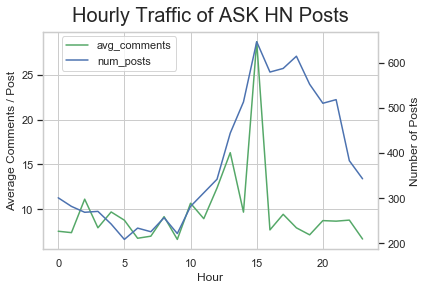

In [25]:
ax = hour_comms.reset_index().plot(x='hour', y='avg_comments', legend=False, color='g')
ax.set_ylabel('Average Comments / Post');
ax.set_xlabel('Hour');
ax.set_title('Hourly Traffic of ASK HN Posts',
            fontdict={'fontsize' : 20,
                     'fontweight' : 3,
                     'horizontalalignment' : 'center'},
            pad=10)
ax2 = ax.twinx()
hour_comms.reset_index().plot(x='hour', y='num_posts', ax=ax2, legend=False, color='b');
ax2.set_ylabel('Number of Posts');
ax.figure.legend(loc=0, bbox_to_anchor=(-0.08, 0.4, 0.5, 0.5));
plt.grid(b=None);
plt.show()

Interestingly, we can conclude that although 3PM is when "Ask HN" posts spike in volume, it is also the optimal time for post engagement, as posting at 2PM and 4PM are associated with a lower amount of engagement from "Ask HN" posts.

# Duplicate methodology for ALL HACKER NEWS posts

We are investigating if this trend is seen across the board, for all Hacker News posts

In [26]:
# Make a DataFrame to show average number of comments for each hour post created - with no filter
all_hn_hour = pd.DataFrame(hn.groupby('hour')['num_comments'].mean())

# rename column to "avg_comments"
all_hn_hour.rename(columns={'num_comments' : 'avg_comments'}, inplace=True)

# list comprehension to create DataFrame describing number of posts logged each hour, filtered by "Ask HN"
all_hn_comms = pd.DataFrame([(hn[hn['hour'] == i]['hour']).count() for i in range(0,24)])

# merge columns based on indexes
all_hn_hour = all_hn_hour.merge(all_hn_comms, left_index=True, right_index=True)

# rename num_comments column
all_hn_hour.rename(columns={0 : 'num_posts'}, inplace=True)

all_hn_hour

,avg_comments,num_posts
hour,,
0,6.584634,8968
1,6.420581,7920
2,7.266533,7455
3,6.434325,7126
4,6.629734,7103
5,6.763005,6536
6,6.170867,7380
7,6.100769,7800
8,6.343291,8503


C:\Users\theyc\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  if sys.path[0] == '':


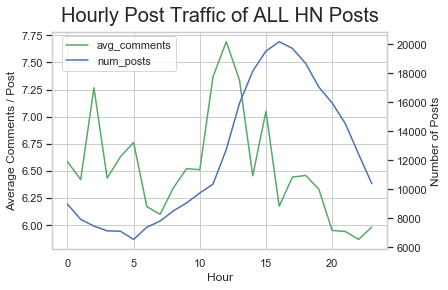

In [27]:
ax = all_hn_hour.reset_index().plot(x='hour', y='avg_comments', legend=False, color='g')
ax.set_ylabel('Average Comments / Post');
ax.set_xlabel('Hour');
ax.set_title('Hourly Post Traffic of ALL HN Posts',
            fontdict={'fontsize' : 20,
                     'fontweight' : 3,
                     'horizontalalignment' : 'center'},
            pad=10)
ax2 = ax.twinx()
all_hn_hour.reset_index().plot(x='hour', y='num_posts', ax=ax2, legend=False, color='b');
ax2.set_ylabel('Number of Posts');
ax.figure.legend(loc=0, bbox_to_anchor=(-0.08, 0.4, 0.5, 0.5));
plt.grid(b=None);
plt.show()

The trend of an optimal time for post engagement of All HN posts does not seem to be consistent with that of Ask HN posts. This does not affect our analysis, as the nature of these posts naturally vary a vast amount. 

For the sake of wanting to find a kind of post that will generate lots of engagement, we can remain focused on the Ask HN results.

# Conclusion

In [28]:
# Quick Calculations
print('All HN > Ask HN: ' + str(10.3 - 6.5))
print('All HN > 15:00: ' + str(28.7 - 9.8))
print('All HN > Ask/15: ' + str(28.7 - 6.5))

All HN > Ask HN: 3.8000000000000007
All HN > 15:00: 18.9
All HN > Ask/15: 22.2


In [29]:
# % increase of comments using "Ask HN" and 15:00
22.2 / 6.5 * 100

341.53846153846155

The trend does seem to be consistent with ALL HN posts. 3PM is the best hour to launch a HN post if you aim to optimize your engagement, and beginning the post with "Ask HN" will also encourage better engagement.

- Adding "Ask HN" to the beginning of your post is likely to increase average number of comments on the post from 6.5 (All HN posts) to 10.3 (Ask HN only) -- which is an increase of about 3.9 comments
- Posting in the 15th hour of the day is likely to increase the average number of comments on an Ask HN post from 9.8 (All HN posts) to 28.7 comments -- which is an increase of about 18.9 comments

Thereby, an "Ask HN" posted in the hour of 15:00 is associated with an increase in average comments of about 342%.